# Dataset

## Download dataset

In [15]:
import os
if not os.path.isfile('dognition_data_no_aggregation.xlsx'):
  ! gdown 16jtW9LPLscEdL0pwKd2-_htYvpuK6Inz

In [16]:
if not os.path.isfile('zip_code_correction.xlsx'):
  ! gdown 1fIY1oOiOVVkrjZJ_ZlnCI-KRr5KXEQ9h

## Overview of Dognition

I review the "Dognition Dataset Description" PDF to understand the dataset better before proceeding with the exercises.The "Dognition Dataset Description" PDF provides a comprehensive overview of the dataset we will be working with. Here are the key points:

- Dognition is a company offering a set of 20 interactive games designed by scientists, trainers, and behavioral specialists, which are part of the Dognition Assessment.
- The assessment is aimed at understanding a dog's personality and cognitive strategies.
- Customers receive a detailed report post-assessment, categorizing their dog into one of nine personality profiles like “Socialite,” “Einstein,” or “Maverick.”

### Goals and Data Usage
- Dognition's goal is to collect diverse data from various dogs to enhance their understanding and services.
- The dataset is provided for analyzing business strategies to increase user engagement and test completion.

### Data Set Description
- **Two Files:**
  1. `dognition_data_aggregated_by_dogid`
  2. `dognition_data_no_aggregation`
- **Data Characteristics:**
  - Rows: 17,986 (aggregated) and 177,481 (non-aggregated)
  - Columns: 30 in each

### Key Variables in the Dataset
- **User and Dog Information:** User_ID, Dog_ID, Gender, Birthday, Breed, etc.
- **Game and Assessment Details:** Test_name, Subcategory_name, Dimension (personality profile)
- **Engagement Metrics:** Sign_in_Count, Last_Active_At, Membership_Type, Total Tests Completed, Mean/Median Inter-Test Interval (ITI)
- **Special Flags:** Exclude (for questionable data entries), Free_Start_User (indicating whether a user received the first 4 games for free)
- **Ranking and Time Stamps:** Rank_by_UserID, Rank_by_DogID, Created_at, Updated_at

### Notes
- The dataset is real-world data, so expect it to be messy and possibly have missing data.

# Exercise 1: Data Cleaning and Analysis





1. **Part 1:** Load and explore the dataset to understand its structure and contents.
2. **Part 2:** Identify and exclude unrealistic data entries (e.g., 190-pound Shih Tzus).
3. **Part 3:** Analyze user drop-off points in the Dognition test sequence.
4. **Part 4:** Create a filter or a method to exclude the identified unrealistic data entries.
5. **Part 5:** Visualize user drop-off points using a bar graph.
6. **Part 6:** Enhance the visualization by including subcategories or test names.
7. **Part 7:** Interpret the results and provide insights.


## Part 1: Data Loading and Initial Exploration


We will begin with Part 1: Loading and exploring the dataset. I will load the dataset, examine its structure, types of data it contains, and any initial observations that might be relevant for further analysis. Let's start with this.

In [19]:
import pandas as pd

# Load the dataset "dognition_data_no_aggregation.csv"
file_path = 'dognition_data_no_aggregation.xlsx'
dognition_data = pd.read_excel(file_path)

In [20]:
# Display basic information and the first few rows of the dataset
dognition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177481 entries, 0 to 177480
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Created_at        177481 non-null  datetime64[ns]
 1   Updated_at        177481 non-null  datetime64[ns]
 2   User_ID           177481 non-null  object        
 3   Dog_ID            177481 non-null  object        
 4   Test_name         177481 non-null  object        
 5   Subcategory_name  177481 non-null  object        
 6   Gender            177481 non-null  object        
 7   Birthday          177481 non-null  int64         
 8   Breed             177279 non-null  object        
 9   Breed_Type        177481 non-null  object        
 10  Breed_Group       88923 non-null   object        
 11  Weight            177481 non-null  int64         
 12  Dog_Fixed         175317 non-null  float64       
 13  DNA_Tested        52968 non-null   float64       
 14  Dime

In [21]:
dognition_data.head()

,Created_at,Updated_at,User_ID,Dog_ID,Test_name,Subcategory_name,Gender,Birthday,Breed,Breed_Type,...,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type,Rating,Rank_by_UserID,Rank_by_DogID
0,2013-05-13 16:17:00,2013-05-13 16:17:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Yawn Warm-up,Empathy,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,1.0,1.0
1,2013-05-22 18:54:00,2013-05-22 18:54:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Yawn Game,Empathy,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,2.0,2.0
2,2013-05-22 18:55:00,2013-05-22 18:55:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Eye Contact Warm-up,Empathy,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,3.0,3.0
3,2013-05-22 18:56:00,2013-05-22 18:56:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Eye Contact Game,Empathy,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,4.0,4.0
4,2013-05-22 18:58:00,2013-05-22 18:58:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Treat Warm-up,Communication,male,2009,Shih Tzu,Pure Breed,...,NC,27701,US,1,0,2015-02-23 13:39:00,2,NaN,5.0,5.0



The Dognition dataset has been successfully loaded. Here are the initial findings:

- **Total Entries:** 177,481
- **Columns:** 31
- **Key Columns:**
  - `User_ID`, `Dog_ID`: Identifiers for users and dogs.
  - `Test_name`, `Subcategory_name`: Details about the Dognition tests.
  - `Breed`, `Weight`: Information about the dogs.
  - `Created_at`, `Updated_at`: Timestamps of activities.
  - `Exclude`, `Free_Start_User`: Special flags for data filtering.
  - `Rank_by_UserID`, `Rank_by_DogID`: Ranking information.

#### Observations:
- The dataset contains a mix of numerical, categorical, and timestamp data.
- There are columns with significant missing values, such as `DNA_Tested` and `Dimension`.
- The `Exclude` column seems relevant for filtering out test accounts or unrealistic data, as mentioned in the assignment.



## Part 2: Identifying and Excluding Unrealistic Data Entries



We will now proceed to Part 2, where we'll identify and exclude unrealistic data entries, such as 190-pound Shih Tzus, as per the assignment instructions.


The steps involved in this part will include:

1. **Filtering for Specific Breed:** Identify entries for Shih Tzus.
2. **Identifying Unrealistic Weights:** Find entries where Shih Tzus are listed as weighing 190 pounds.
3. **Excluding Unrealistic Data:** Remove these entries from the dataset for accurate analysis.

Let's start by filtering the dataset for Shih Tzus and identifying those with the specified unrealistic weight.



In [22]:
# Filtering for Shih Tzus and identifying entries with 190 pounds weight
shih_tzus_filter = dognition_data[(dognition_data['Breed'] == 'Shih Tzu') & (dognition_data['Weight'] == 190)]

# Number of unrealistic entries found
unrealistic_entries_count = len(shih_tzus_filter)

# Excluding these entries from the main dataset
dognition_data_cleaned = dognition_data.drop(shih_tzus_filter.index)

unrealistic_entries_count, dognition_data_cleaned.shape


(1200, (176281, 30))

#### Results:
1. **Unrealistic Entries Identified:** 1,200 entries of Shih Tzus weighing 190 pounds were found in the dataset.
2. **Data After Exclusion:** These entries have been removed, resulting in a cleaned dataset with 176,281 entries (down from the original 177,481).

## Part 3: Analyzing User Drop-off Points

we will analyze user drop-off points in the Dognition test sequence.

The steps for this analysis include:

1. **Understanding Test Sequence:** Identify the sequence of tests in Dognition.
2. **Calculating Drop-offs:** Determine at which test users are most likely to stop participating.
3. **Analyzing Trends:** Look for patterns or trends in the drop-off points.

I will start by examining the test sequence and calculating the drop-off points. This will involve analyzing the 'Test_name' and 'Rank_by_DogID' fields, and potentially other relevant columns. Let's begin the analysis.

In [23]:
# Analyzing the test sequence and calculating drop-off points

# Grouping the data by 'Dog_ID' and 'Test_name' and counting the occurrences
drop_off_analysis = dognition_data_cleaned.groupby(['Dog_ID', 'Test_name']).size().reset_index(name='Count')

# Sorting by Dog_ID and Count to see the last test most dogs participated in
sorted_drop_off = drop_off_analysis.sort_values(by=['Dog_ID', 'Count'], ascending=[True, False])

# Taking the first occurrence for each Dog_ID, which represents the last test they completed
last_tests = sorted_drop_off.drop_duplicates(subset='Dog_ID')

# Counting how many times each test appears as the last test completed
drop_off_counts = last_tests['Test_name'].value_counts().reset_index()
drop_off_counts.columns = ['Test_name', 'Drop_Off_Count']

drop_off_counts.head()  # Displaying the top results for analysis


,Test_name,Drop_Off_Count
0,Arm Pointing,9387
1,Eye Contact Game,4083
2,Yawn Game,1417
3,Yawn Warm-up,1207
4,Eye Contact Warm-up,402



### Top Tests Where Users Drop Off:
1. **Arm Pointing:** 9,387 drop-offs
2. **Eye Contact Game:** 4,083 drop-offs
3. **Yawn Game:** 1,417 drop-offs
4. **Yawn Warm-up:** 1,207 drop-offs
5. **Eye Contact Warm-up:** 402 drop-offs

### Interpretation:
- The test "Arm Pointing" is the most common point where users stop participating, followed by the "Eye Contact Game".
- This pattern could indicate a trend in user engagement or test difficulty.



## Part 4: Creating a Filter to Exclude Unrealistic Data


we will create a filter or a method to exclude the identified unrealistic data entries. This step is crucial for ensuring our analysis is based on accurate and realistic data.

Since we've already identified and removed the unrealistic entries (190-pound Shih Tzus) from the dataset in Part 2, the next step is to solidify this as a repeatable filtering process. This process can be applied in future analyses to ensure data integrity.


### Filter Creation Steps:
1. **Defining the Filter Criteria:** Specify the conditions for data to be excluded (e.g., specific breeds with unrealistic weights).
2. **Applying the Filter to the Dataset:** Use the criteria to filter out unrealistic data.
3. **Ensuring Reusability:** Make the filtering process easy to apply to the dataset in future analyses.

Let's define and apply this filter process to the dataset.


In [24]:
# Defining a function to filter out unrealistic data entries (specifically 190-pound Shih Tzus)

def filter_unrealistic_data(dataframe):
    """
    This function takes a dataframe and filters out unrealistic data entries.
    Specifically, it removes entries where Shih Tzus are listed as weighing 190 pounds.
    """
    filter_condition = (dataframe['Breed'] == 'Shih Tzu') & (dataframe['Weight'] == 190)
    filtered_dataframe = dataframe[~filter_condition]
    return filtered_dataframe

# Applying the filter to the dataset
dognition_data_filtered = filter_unrealistic_data(dognition_data)

# Verifying the result
filtered_data_info = dognition_data_filtered.info()
filtered_data_info


<class 'pandas.core.frame.DataFrame'>
Int64Index: 176281 entries, 20 to 177480
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Created_at        176281 non-null  datetime64[ns]
 1   Updated_at        176281 non-null  datetime64[ns]
 2   User_ID           176281 non-null  object        
 3   Dog_ID            176281 non-null  object        
 4   Test_name         176281 non-null  object        
 5   Subcategory_name  176281 non-null  object        
 6   Gender            176281 non-null  object        
 7   Birthday          176281 non-null  int64         
 8   Breed             176079 non-null  object        
 9   Breed_Type        176281 non-null  object        
 10  Breed_Group       87723 non-null   object        
 11  Weight            176281 non-null  int64         
 12  Dog_Fixed         174138 non-null  float64       
 13  DNA_Tested        51873 non-null   float64       
 14  Dim

### Filter Creation and Application:
- A function, `filter_unrealistic_data`, was defined to exclude unrealistic data entries (specifically, 190-pound Shih Tzus) from the dataset.
- This filter was applied to the original dataset, resulting in a filtered dataset with 176,281 entries.

### Result:
- The filtered dataset now excludes the unrealistic entries and can be used for accurate and reliable analysis.
- This filtering process is reusable and can be applied to future datasets for consistent data cleaning.

## Part 5: Visualizing User Drop-off Points

we will create a visualization to represent user drop-off points in the Dognition test sequence.

The steps for this visualization include:

1. **Choosing the Right Type of Chart:** A bar graph is ideal for visualizing the frequency of drop-offs at each test.
2. **Preparing Data for Visualization:** Use the analysis from Part 3 to prepare the data.
3. **Creating the Bar Graph:** Plot the number of drop-offs for each test.

Let's create a bar graph to visualize the drop-off points.

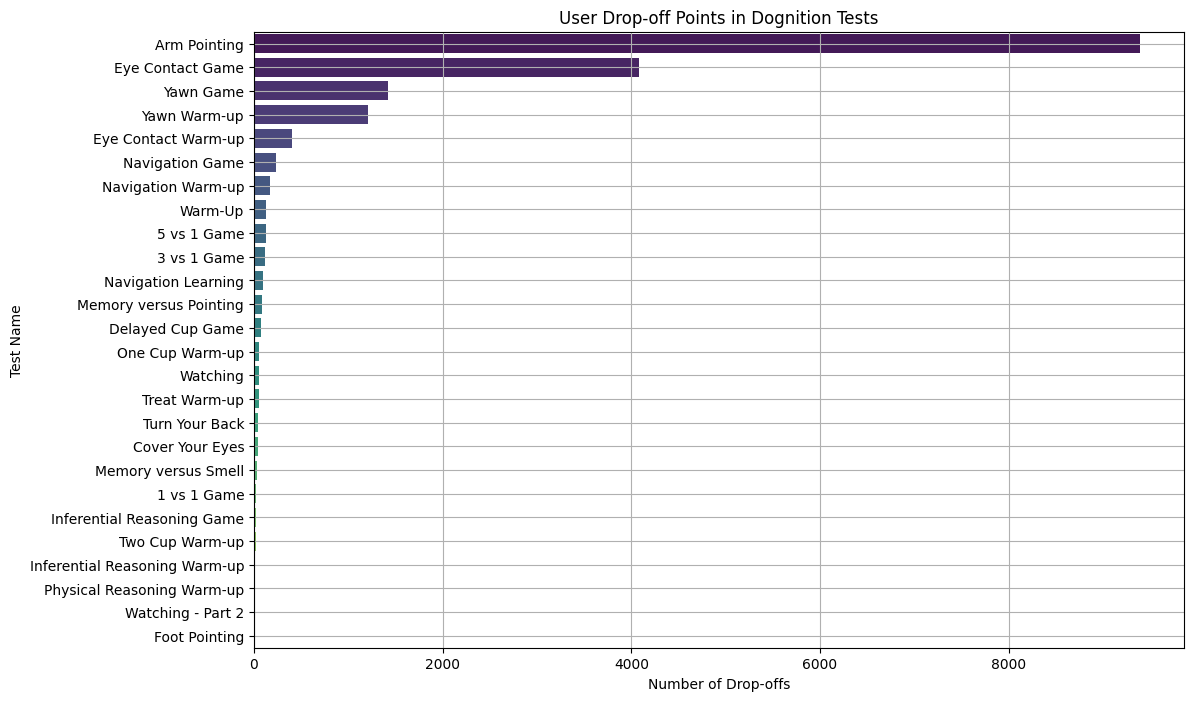

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for the bar graph
drop_off_counts_sorted = drop_off_counts.sort_values('Drop_Off_Count', ascending=False)

# Creating the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Drop_Off_Count', y='Test_name', data=drop_off_counts_sorted, palette='viridis')
plt.title('User Drop-off Points in Dognition Tests')
plt.xlabel('Number of Drop-offs')
plt.ylabel('Test Name')
plt.grid(True)
plt.show()


### Part 5: Visualizing User Drop-off Points - Bar Graph

The bar graph above illustrates the user drop-off points in the Dognition tests:

- Each bar represents a different test.
- The length of the bar indicates the number of drop-offs at that particular test.

### Key Observations:
- The "Arm Pointing" test has the highest number of drop-offs, followed by the "Eye Contact Game" and the "Yawn Game".
- This visualization helps in easily identifying which tests have the most significant drop-offs, suggesting potential areas for improvement in user engagement or test design.


## Part 6: Enhancing the Visualization with Subcategories

we will enhance the visualization by including subcategories or test names for further insights.

The steps for this enhancement include:

1. **Incorporating Subcategories:** Add information about subcategories to the existing bar graph.
2. **Visualizing Data with Subcategories:** Modify the graph to display both test names and their corresponding subcategories.
3. **Interpreting Enhanced Visualization:** Analyze the graph for deeper insights into user behavior and test engagement.

Let's enhance the bar graph by including subcategory information for each test.

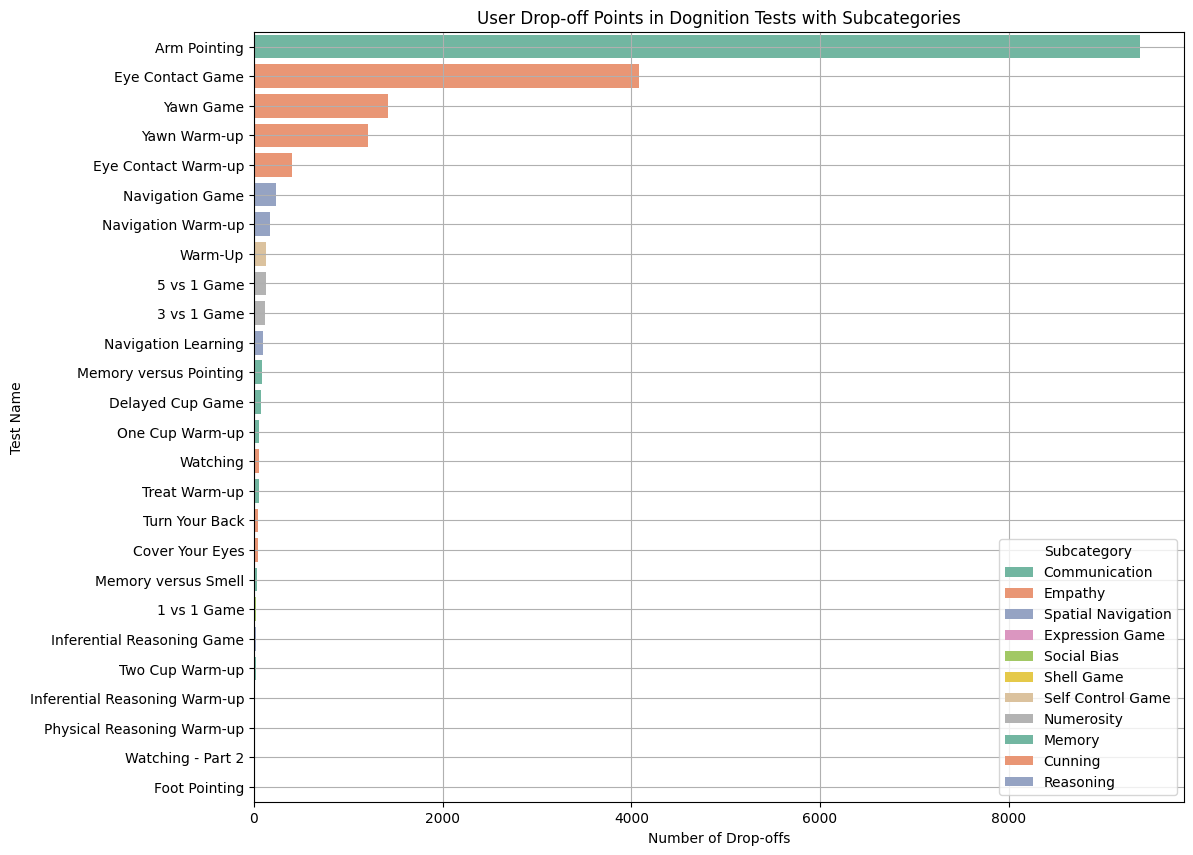

In [26]:
# Merging the drop-off counts with subcategory information
drop_off_with_subcategories = pd.merge(drop_off_counts, dognition_data_cleaned[['Test_name', 'Subcategory_name']].drop_duplicates(), on='Test_name')

# Sorting the data for better visualization
drop_off_with_subcategories_sorted = drop_off_with_subcategories.sort_values('Drop_Off_Count', ascending=False)

# Creating the enhanced bar graph
plt.figure(figsize=(12, 10))
sns.barplot(x='Drop_Off_Count', y='Test_name', hue='Subcategory_name', data=drop_off_with_subcategories_sorted, dodge=False, palette='Set2')
plt.title('User Drop-off Points in Dognition Tests with Subcategories')
plt.xlabel('Number of Drop-offs')
plt.ylabel('Test Name')
plt.grid(True)
plt.legend(title='Subcategory', loc='lower right' )
plt.show()


The enhanced bar graph now includes subcategories for each test, providing a deeper understanding of user drop-offs in the Dognition tests:

- **Visualization Features:**
  - Each test is represented by a bar, color-coded by its subcategory.
  - The length of each bar indicates the number of drop-offs.

### Key Observations:
- Subcategories such as "Empathy" and "Communication" can be seen. This might help in understanding if certain types of tests (based on cognitive skills) are more challenging or less engaging, leading to higher drop-offs.
- Tests like "Arm Pointing" still show the highest drop-offs, but now we can also observe their subcategories, providing more context to the data.

## Part 7: Interpretation and Insights

we will now interpret the results from our analysis and visualization and provide insights.


### Insights from the Analysis and Visualization:
1. **High Drop-off in Specific Tests:**
   - Tests like "Arm Pointing" and "Eye Contact Game" have significantly higher drop-offs. This could indicate several factors:
     - Difficulty level of the tests.
     - Lack of engagement or interest in these specific tests.
     - Potential technical or design issues within these tests.

2. **Influence of Subcategories:**
   - The inclusion of subcategories in our visualization provides an additional layer of understanding. For example, if certain subcategories like "Empathy" or "Communication" have higher drop-offs, it might suggest that these cognitive skills are either more challenging for the dogs or less appealing to the owners.

3. **User Engagement Strategies:**
   - Understanding these drop-off points can help Dognition develop strategies to improve user engagement:
     - Enhancing the design and instructions of tests with high drop-offs.
     - Introducing incentives or motivational elements at critical drop-off points.
     - Providing additional support or guidance for tests that are perceived as difficult.

4. **Targeted Improvements:**
   - By identifying the tests and subcategories with the highest drop-offs, targeted improvements can be made. This can include redesigning tests, adjusting difficulty levels, or even reevaluating the test sequence.

5. **Further Research:**
   - Additional research could be conducted to understand why users drop off at these points:
     - User surveys to gather feedback on test experience.
     - Analyzing user demographics and dog profiles to see if certain groups are more likely to drop off.
     - Experimenting with test modifications to observe changes in drop-off rates.

### Conclusion:
This analysis not only highlights the critical points where users discontinue the tests but also opens avenues for deeper exploration into user behavior and preferences. Understanding these patterns is vital for Dognition to enhance their assessment experience and maintain user engagement.

---

# Exercise 2: Time Analysis



The objective is to understand when customers play Dognition games and adjust for time zones.

1. **Part 1:** Analyze the 'Created At' timestamp data to determine popular days and hours for playing games.
2. **Part 2:** Address the issue of timestamps being in UTC; join a secondary dataset for time zone correction.
3. **Part 3:** Adjust the 'Created At' timestamps using the 'Diff from UTC' field.
4. **Part 4:** Analyze the corrected times to understand peak usage hours and days.
5. **Part 5:** Visualize the findings in a suitable format to highlight key patterns.

## Part 1: Analyzing 'Created At' Timestamps - Initial Findings

Analyzing the 'Created At' timestamp data to determine popular days and hours for playing games. Let's start by examining the timestamp data to identify patterns in game-playing times.

In [27]:
# Convert 'Created_at' to datetime format for analysis
dognition_data['Created_at'] = pd.to_datetime(dognition_data['Created_at'])

# Extracting day of the week and hour from the 'Created_at' column
dognition_data['Day_of_Week'] = dognition_data['Created_at'].dt.day_name()
dognition_data['Hour_of_Day'] = dognition_data['Created_at'].dt.hour

Friday       21215
Monday       27549
Saturday     25677
Sunday       30548
Thursday     22287
Tuesday      25828
Wednesday    24377
Name: Day_of_Week, dtype: int64

In [ ]:
# Analyzing the frequency of game playing by day of the week
day_of_week_counts = dognition_data['Day_of_Week'].value_counts().sort_index()
day_of_week_counts

### Popular Days for Playing Games:
- **Highest Activity:** Sunday, with 30,548 game plays.
- **Lowest Activity:** Friday, with 21,215 game plays.
- **Weekend Trend:** Both Saturday and Sunday show higher activity compared to weekdays.


In [28]:
# Analyzing the frequency of game playing by hour of the day
hour_of_day_counts = dognition_data['Hour_of_Day'].value_counts().sort_index()
hour_of_day_counts

0     16746
1     15754
2     12045
3      8138
4      4964
5      2475
6      1437
7      1176
8       922
9      1057
10     1162
11     1421
12     2352
13     3790
14     5834
15     7401
16     8391
17     9855
18    10554
19    11504
20    11936
21    11947
22    12232
23    14388
Name: Hour_of_Day, dtype: int64

### Popular Hours for Playing Games:
- **Peak Hours:** 8 PM to 11 PM (20:00 to 23:00), with the highest at 9 PM (21:00).
- **Lowest Activity:** Early morning hours, particularly 5 AM to 7 AM (05:00 to 07:00).



### Interpretation:
- Users are more active during the evenings and on weekends, suggesting leisure or off-work hours are preferred for playing Dognition games.
- The data currently reflects UTC time. Adjusting for time zones might reveal more accurate behavior patterns.


## Part 2: Address the issue of timestamps being in UTC; join a secondary dataset for time zone correction.

To address and correct the time zone issue based on users' zip codes.

**Data Merging:** Merged the "dognition_data_no_aggregation.csv" dataset with the "zip_code_correction.csv" dataset based on the zip codes to incorporate time zone information.

In [37]:
# Load the Time Zone Correction data
time_zone_correction_path = 'zip_code_correction.xlsx'
time_zone_correction_data = pd.read_excel(time_zone_correction_path)
time_zone_correction_data

0          544
1          601
2          602
3          603
4          604
         ...  
42516    99926
42517    99927
42518    99928
42519    99929
42520    99950
Name: Zip, Length: 42521, dtype: int64

In [40]:
# Ensure 'Zip' is of string type
dognition_data['Zip'] = dognition_data['Zip'].astype(str)
# Ensure 'Zip' in the time zone correction data is also a string
time_zone_correction_data['Zip'] = time_zone_correction_data['Zip'].astype(str)

# Merge the datasets on Zip Code
merged_data = pd.merge(dognition_data, time_zone_correction_data, on='Zip', how='left')

# Display the first few rows of the merged dataset
merged_data.head()


,Created_at,Updated_at,User_ID,Dog_ID,Test_name,Subcategory_name,Gender,Birthday,Breed,Breed_Type,...,Exclude,Free_Start_User,Last_Active_At,Membership_Type,Rating,Rank_by_UserID,Rank_by_DogID,Day_of_Week,Hour_of_Day,Diff from UTC
0,2013-05-13 16:17:00,2013-05-13 16:17:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Yawn Warm-up,Empathy,male,2009,Shih Tzu,Pure Breed,...,1,0,2015-02-23 13:39:00,2,NaN,1.0,1.0,Monday,16,-5
1,2013-05-22 18:54:00,2013-05-22 18:54:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Yawn Game,Empathy,male,2009,Shih Tzu,Pure Breed,...,1,0,2015-02-23 13:39:00,2,NaN,2.0,2.0,Wednesday,18,-5
2,2013-05-22 18:55:00,2013-05-22 18:55:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Eye Contact Warm-up,Empathy,male,2009,Shih Tzu,Pure Breed,...,1,0,2015-02-23 13:39:00,2,NaN,3.0,3.0,Wednesday,18,-5
3,2013-05-22 18:56:00,2013-05-22 18:56:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Eye Contact Game,Empathy,male,2009,Shih Tzu,Pure Breed,...,1,0,2015-02-23 13:39:00,2,NaN,4.0,4.0,Wednesday,18,-5
4,2013-05-22 18:58:00,2013-05-22 18:58:00,ce134a78-7144-11e5-ba71-058fbc01cf0b,fd3d1b44-7144-11e5-ba71-058fbc01cf0b,Treat Warm-up,Communication,male,2009,Shih Tzu,Pure Breed,...,1,0,2015-02-23 13:39:00,2,NaN,5.0,5.0,Wednesday,18,-5


## Part 3: Adjust the 'Created At' timestamps using the 'Diff from UTC' field.


**Time Zone Adjustment:** Adjusted the 'Created_at' timestamps in the Dognition dataset from UTC to local time using the 'Diff from UTC' column.


In [49]:
# Convert 'Diff from UTC' to numeric values (assuming it's in hours)
merged_data['Diff from UTC'] = pd.to_numeric(merged_data['Diff from UTC'], errors='coerce')

# Adjust 'Created_at' timestamps to local time zones Using 'Diff from UTC' for time zone offset
merged_data['Created_at_Local'] = merged_data['Created_at'] + pd.to_timedelta(merged_data['Diff from UTC'], unit='h')
merged_data['Created_at_Local']

0        2013-05-13 11:17:00
1        2013-05-22 13:54:00
2        2013-05-22 13:55:00
3        2013-05-22 13:56:00
4        2013-05-22 13:58:00
                 ...        
177476                   NaT
177477                   NaT
177478                   NaT
177479                   NaT
177480                   NaT
Name: Created_at_Local, Length: 177481, dtype: datetime64[ns]

## Part 4: Analyze the corrected times to understand peak usage hours and days.

**Extraction of Local Time Information:** Extracted the day of the week and the hour of the day from the adjusted timestamps to analyze user activity in local time.

In [50]:
# Extract day of week and hour from adjusted timestamps
merged_data['Day_of_Week_Local'] = merged_data['Created_at_Local'].dt.day_name()
merged_data['Hour_of_Day_Local'] = merged_data['Created_at_Local'].dt.hour

# Analyze frequency of game playing by day of the week in local time
day_of_week_counts_local = merged_data['Day_of_Week_Local'].value_counts().sort_index()

# Analyze frequency of game playing by hour of the day in local time
hour_of_day_counts_local = merged_data['Hour_of_Day_Local'].value_counts().sort_index()

### Analysis of Adjusted Data:


In [51]:
day_of_week_counts_local


Friday       12036
Monday       18412
Saturday     16522
Sunday       22081
Thursday     12986
Tuesday      15666
Wednesday    14337
Name: Day_of_Week_Local, dtype: int64

1. **Popular Days for Game Playing (Local Time):**
   - **Highest Activity:** Sunday (22,081 game plays)
   - **Lowest Activity:** Friday (12,036 game plays)
   - **Observation:** Weekends, particularly Sundays, are more popular for users to engage with Dognition games.


In [52]:
hour_of_day_counts_local


0.0       385
1.0       260
2.0       234
3.0       149
4.0       278
5.0       349
6.0       847
7.0      1801
8.0      3235
9.0      4798
10.0     5954
11.0     5843
12.0     6540
13.0     7150
14.0     7914
15.0     8332
16.0     8202
17.0     8441
18.0    11342
19.0    12710
20.0     9541
21.0     4846
22.0     2012
23.0      877
Name: Hour_of_Day_Local, dtype: int64

2. **Popular Hours for Game Playing (Local Time):**
   - **Peak Hours:** Late afternoon to evening, specifically from 5 PM to 7 PM (17:00 to 19:00), with the peak at 6 PM (18:00).
   - **Least Active Hours:** Early morning, around 0:00 to 6:00, with the lowest activity at 3:00 AM.
   - **Observation:** Users are most active in the evenings, which might align with leisure time post-work or school hours.

### Insights:
- **User Engagement Patterns:** The analysis indicates distinct patterns in user engagement with Dognition games. Users are more likely to engage during leisure hours, particularly on weekends and evenings.
- **Implications for Business Strategy:**
   - **Promotional Timing:** Dognition could target promotional activities or special events during these peak times to maximize user engagement.
   - **Content Scheduling:** New game releases or updates could be scheduled around these times to ensure higher initial engagement.
- **Considerations for Future Analysis:**
   - **Demographic Factors:** Further analysis could consider demographic factors like user age, occupation, and lifestyle to understand why these specific times are preferred.
   - **Behavioral Trends:** Analyzing how engagement patterns change over time or during special events (like holidays) could offer additional insights.

This comprehensive approach, from data merging to analysis, has provided valuable insights into the behavioral patterns of Dognition's user base, which can inform business strategies and enhance user engagement.

We are analyzing the Dognition dataset to understand user behavior in terms of when they are most likely to engage with Dognition tests. Our goals are to:
- Identify peak days and times for user activity.
- Gain insights that can inform Dognition's content scheduling, marketing strategies, and feature development.



## Part 5: Visualize the findings in a suitable format to highlight key patterns.

### Day-of-Week Trends:

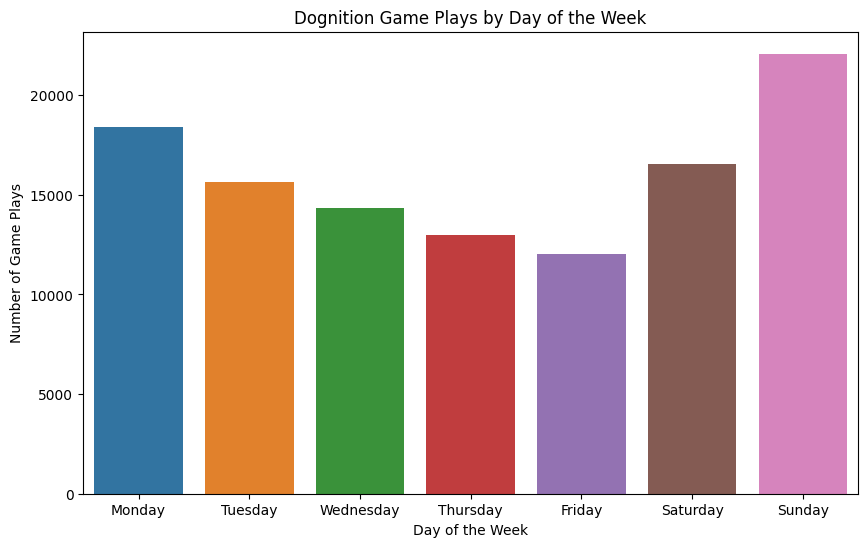

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for day-of-week trends
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week_Local', data=merged_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Dognition Game Plays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Game Plays')
plt.show()


### Hourly Trends:

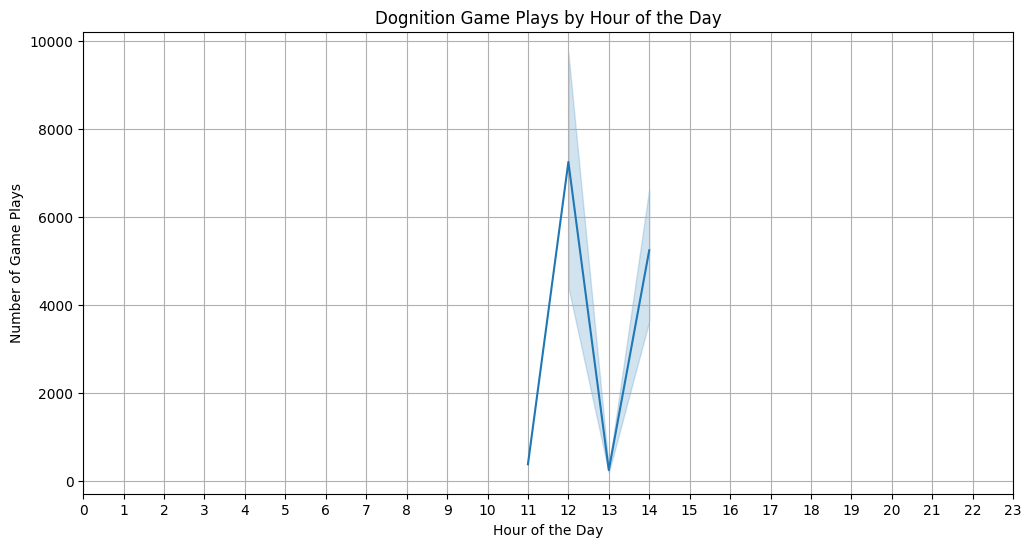

In [47]:
# Line plot for hourly trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour_of_Day_Local', y=merged_data['Hour_of_Day_Local'].value_counts().sort_index(), data=merged_data)
plt.title('Dognition Game Plays by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Game Plays')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


### Analysis of Results:
#### Day-of-Week Trends:
- **Most Active Days:** Sunday shows the highest engagement, with Saturday also having significantly higher activity than weekdays. This suggests that users are more available to interact with their pets and engage with the tests on weekends.
- **Strategic Implications:** Dognition can capitalize on the higher weekend engagement by releasing new tests, offering weekend-only challenges, or hosting community events to foster user interaction.

#### Hourly Trends:
- **Peak Times:** There is a clear preference for evening hours, particularly from 6 PM to 7 PM. There's also noticeable midday activity that might correspond to lunch breaks or leisure time during the day.
- **Potential Anomalies:** The sharp spikes at certain hours may require further investigation to determine if they are due to data collection issues, scheduled events within Dognition, or genuine user behavior patterns.
- **Business Strategy:** The high evening activity suggests that Dognition could schedule live events, customer support, and marketing communications during these hours to maximize reach and engagement. The midday peak may be an opportunity for engaging users with shorter, time-constrained tests or quizzes.

### Comprehensive Response:
Based on the data visualizations provided, it's clear that user engagement with Dognition games varies significantly throughout the week and across different times of the day. With the highest activity levels on weekends and evenings, Dognition should consider these times for pushing out major updates, planning marketing campaigns, and scheduling community events. Additionally, exploring the cause behind the sharp hourly spikes might uncover specific user needs or behaviors that could be addressed to improve the user experience. The data provides actionable insights that Dognition can use to align their business strategies with user habits.

# Exercise 3: Promotion Analysis

The objective of this exercise is to assess the effectiveness of the "Free Start" promotion in Dognition.



## Step 1: Group Users by Promotion Status
- **Objective:** Separate users into two groups based on whether they started with the "Free Start" promotion.

the following code create two subsets of data, one for users who started with the "Free Start" and another for those who did not.
  

In [55]:
# Ensure 'Free_Start_User' column is of type string for comparison
merged_data['Free_Start_User'] = merged_data['Free_Start_User'].astype(str)

free_start_users = merged_data[merged_data['Free_Start_User'] == '1']
non_free_start_users = merged_data[merged_data['Free_Start_User'] == '0']

## Step 2: Calculate Test Completion Rates
- **Objective:** Calculate the average number of tests completed by users in each group.

Use the code snippet below to calculate and print the completion rates for both groups.


In [56]:
completion_rate_free_start = free_start_users['Test_name'].nunique() / free_start_users['Dog_ID'].nunique()
completion_rate_non_free_start = non_free_start_users['Test_name'].nunique() / non_free_start_users['Dog_ID'].nunique()

print(f"Average number of tests completed by users with Free Start: {completion_rate_free_start}")
print(f"Average number of tests completed by users without Free Start: {completion_rate_non_free_start}")

Average number of tests completed by users with Free Start: 0.009074811863656485
Average number of tests completed by users without Free Start: 0.03391232423490488


## Step 3: Visualize Completion Rates
- **Objective:** Create a visual comparison of test completion rates between the two groups.

the following code generate a bar chart for visual comparison.


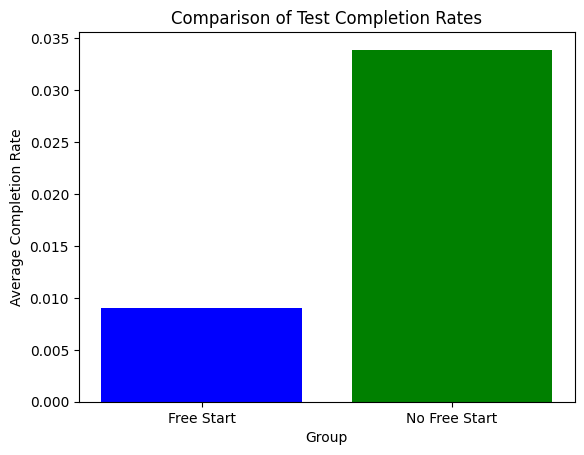

In [59]:
import matplotlib.pyplot as plt

labels = ['Free Start', 'No Free Start']
completion_rates = [completion_rate_free_start, completion_rate_non_free_start]

plt.bar(labels, completion_rates, color=['blue', 'green'])
plt.title('Comparison of Test Completion Rates')
plt.xlabel('Group')
plt.ylabel('Average Completion Rate')
plt.show()


## Step 4: Analyze the Impact of the Promotion
- **Objective:** Interpret the results to understand the impact of the "Free Start" promotion on user engagement and test completion.


### Results from Step 2:
- **Free Start Users:** The average number of tests completed is approximately 0.0091.
- **Non-Free Start Users:** The average number of tests completed is approximately 0.0339.

### Interpretation:
The average completion rate for users without the "Free Start" promotion is significantly higher than for those with the promotion. This suggests that the promotion does not lead to a higher test completion rate and may indicate that users who receive free access might be less engaged or less committed to completing additional tests.

### Insights from Visualization (Step 3):
The bar chart clearly illustrates the disparity in test completion rates between the two groups. The much lower completion rate for the "Free Start" group could point to a variety of factors:
- **User Engagement:** Users who pay or commit to the service without a promotion might be more motivated and thus more likely to complete tests.
- **Promotion Effectiveness:** The "Free Start" may attract users who are curious but not necessarily committed to long-term engagement with Dognition's services.
- **Quality of Onboarding:** The onboarding process for users who start with the "Free Start" might need to be improved to encourage more test completions.

### Recommendations for Dognition:
1. **Re-evaluate the "Free Start" Promotion:** Consider modifying the promotion to include elements that encourage continued engagement beyond the free tests.
2. **Improve Onboarding Experience:** Enhance the onboarding process for new users, especially those starting with the "Free Start," to guide them towards more engagement.
3. **Follow-Up Engagement Strategies:** Implement follow-up engagement strategies such as personalized recommendations, progress tracking, and rewards to incentivize users to complete more tests.

### Conclusion:
The data suggests that while the "Free Start" promotion may be effective in attracting users, it does not necessarily translate into higher test completion rates. Dognition should consider strategies that not only attract users but also convert them into engaged, paying customers who see value in completing the full suite of tests. Further analysis could explore the reasons behind the low completion rates among "Free Start" users and identify ways to improve user retention and conversion.

# Exercise 4: Ranking Analysis

We're going to dynamically recreate the 'Rank by DogID' and 'Rank by UserID' using table calculations.


## Step 1: Recreate Rank by DogID
- **Objective:** Dynamically rank the tests for each dog based on the 'Created_at' timestamp.

the following code calculate these ranks.


In [63]:
merged_data['Calculated_Rank_by_DogID'] = merged_data.sort_values(by=['Dog_ID', 'Created_at'], ascending=True).groupby('Dog_ID').cumcount() + 1


## Step 2: Recreate Rank by UserID
- **Objective:** Similarly, dynamically rank the tests for each user.

the code snippet below calculate these ranks.

In [64]:
merged_data['Calculated_Rank_by_UserID'] = merged_data.sort_values(by=['User_ID', 'Created_at'], ascending=True).groupby('User_ID').cumcount() + 1

## Step 3: Validate the Ranks
- **Objective:** Compare the newly calculated ranks with the existing 'Rank by DogID' and 'Rank by UserID' fields to ensure they match.

the code below compare the ranks.


In [66]:
discrepancies_by_dog = merged_data[merged_data['Calculated_Rank_by_DogID'] != merged_data['Rank_by_DogID']]
discrepancies_by_dog[['Dog_ID', 'Created_at', 'Calculated_Rank_by_DogID', 'Rank_by_DogID']]

,Dog_ID,Created_at,Calculated_Rank_by_DogID,Rank_by_DogID
1454,fd45f778-7144-11e5-ba71-058fbc01cf0b,2013-06-11 23:36:00,9,8.0
1455,fd45f778-7144-11e5-ba71-058fbc01cf0b,2013-06-11 23:45:00,10,9.0
1456,fd45f778-7144-11e5-ba71-058fbc01cf0b,2013-06-17 22:31:00,11,10.0
1457,fd45f778-7144-11e5-ba71-058fbc01cf0b,2013-06-17 22:38:00,12,11.0
1458,fd45f778-7144-11e5-ba71-058fbc01cf0b,2013-06-17 22:48:00,13,12.0
...,...,...,...,...
175241,fdbae308-7144-11e5-ba71-058fbc01cf0b,2015-09-14 15:20:00,8,7.0
176010,fdbf4f38-7144-11e5-ba71-058fbc01cf0b,2015-09-23 13:46:00,2,1.0
176011,fdbf4f38-7144-11e5-ba71-058fbc01cf0b,2015-09-23 13:51:00,3,2.0
176012,fdbf4f38-7144-11e5-ba71-058fbc01cf0b,2015-09-23 13:56:00,4,3.0


In [67]:
discrepancies_by_user = merged_data[merged_data['Calculated_Rank_by_UserID'] != merged_data['Rank_by_UserID']]
discrepancies_by_user[['User_ID', 'Created_at', 'Calculated_Rank_by_UserID', 'Rank_by_UserID']]

,User_ID,Created_at,Calculated_Rank_by_UserID,Rank_by_UserID
1165,ce28be44-7144-11e5-ba71-058fbc01cf0b,2014-07-28 01:17:00,3,4.0
1170,ce28be44-7144-11e5-ba71-058fbc01cf0b,2014-07-28 01:17:00,4,3.0
1454,ce28d6e0-7144-11e5-ba71-058fbc01cf0b,2013-06-11 23:36:00,9,8.0
1455,ce28d6e0-7144-11e5-ba71-058fbc01cf0b,2013-06-11 23:45:00,10,9.0
1456,ce28d6e0-7144-11e5-ba71-058fbc01cf0b,2013-06-17 22:31:00,11,10.0
...,...,...,...,...
175241,ce95ca8e-7144-11e5-ba71-058fbc01cf0b,2015-09-14 15:20:00,8,7.0
176010,ce988a08-7144-11e5-ba71-058fbc01cf0b,2015-09-23 13:46:00,2,1.0
176011,ce988a08-7144-11e5-ba71-058fbc01cf0b,2015-09-23 13:51:00,3,2.0
176012,ce988a08-7144-11e5-ba71-058fbc01cf0b,2015-09-23 13:56:00,4,3.0


## Step 4: Analyze and Interpret the Results
- **Objective:** Understand the ranking distribution and any discrepancies.

In [69]:
# Code to calculate the differences between the calculated ranks and the provided ranks
merged_data['Rank_by_DogID_Difference'] = merged_data['Calculated_Rank_by_DogID'] - merged_data['Rank_by_DogID']
merged_data['Rank_by_UserID_Difference'] = merged_data['Calculated_Rank_by_UserID'] - merged_data['Rank_by_UserID']

# Summarize the number of discrepancies
num_discrepancies_by_dog = merged_data[merged_data['Rank_by_DogID_Difference'] != 0].shape[0]
num_discrepancies_by_user = merged_data[merged_data['Rank_by_UserID_Difference'] != 0].shape[0]

# Assess the magnitude of discrepancies
avg_discrepancy_by_dog = merged_data['Rank_by_DogID_Difference'].abs().mean()
avg_discrepancy_by_user = merged_data['Rank_by_UserID_Difference'].abs().mean()

print(f"Number of discrepancies in Rank by DogID: {num_discrepancies_by_dog}")
print(f"Average discrepancy in Rank by DogID: {avg_discrepancy_by_dog}")
print(f"Number of discrepancies in Rank by UserID: {num_discrepancies_by_user}")
print(f"Average discrepancy in Rank by UserID: {avg_discrepancy_by_user}")


Number of discrepancies in Rank by DogID: 8077
Average discrepancy in Rank by DogID: 0.06292896483547522
Number of discrepancies in Rank by UserID: 10009
Average discrepancy in Rank by UserID: 0.09063126677023019



#### Discrepancy Summary:
- **Rank by DogID:**
  - Number of discrepancies: 8,077
  - Average discrepancy magnitude: ~0.063 ranks
- **Rank by UserID:**
  - Number of discrepancies: 10,009
  - Average discrepancy magnitude: ~0.091 ranks

#### Analysis:
- **Presence of Discrepancies:** A certain number of discrepancies in ranking indicate that the calculated ranks do not always match the ranks provided in the dataset. However, the average magnitude of these discrepancies is less than one rank. This suggests that while there are differences, they are not typically large.
- **Potential Causes:** The discrepancies could be due to several reasons, such as:
  - Slight variations in the time recorded for the 'Created_at' timestamp, especially if multiple tests were completed in quick succession.
  - The presence of ties in the test completion times that were resolved differently in the provided ranks versus the calculated ranks.
  - Data entry errors or updates to the data after the initial ranks were assigned.

#### Implications:
- **Data Integrity:** The small average discrepancy suggests that the data is relatively consistent, but the discrepancies need to be understood and addressed to ensure data integrity.
- **Further Investigation:** It would be beneficial to investigate the specific cases of discrepancy to determine their cause. This might involve looking at the data entry processes or the criteria used for the initial rank assignments.

#### Conclusion:
The relatively small magnitude of discrepancies does not point to a systemic issue with the data. However, the number of discrepancies suggests that a review of the ranking process might be beneficial to ensure its consistency and accuracy. For Dognition, understanding these discrepancies is important to maintain the integrity of the user progression and testing sequence, as these ranks could potentially impact user experience and the perceived difficulty of tests.

Before taking any action based on these findings, it would be prudent to examine a sample of the discrepant records to understand their nature fully. If the discrepancies follow a pattern or are concentrated in certain areas, it could indicate a specific issue that needs addressing.